In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

In [2]:
X, Y = load_boston().data, load_boston().target

**Linear Regression**

the formula for linear regression is $\hat{Y} = \beta_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $. 
It can be solved using $\frac{\partial RSS}{\partial{\beta}} = 0$


In [5]:
class LinearRegression():
    def __init__(self, fit_intercept=False):
        self.fit_intercept = fit_intercept
        
    def _add_intercept(self):     
        if self.fit_intercept:
            x0_array = np.ones([self.X.shape[0], 1])
            self.X = np.concatenate((x0_array, self.X), axis=1)
        
    def fit(self, X, Y):
        self._add_intercept()
        X_X = X.T @ X
        X_Y = X.T @ Y
        self.beta = np.linalg.inv(X_X) @ X_Y
        
    def predict(self, X):
        return X @ self.beta
    
class Ridge(LinearRegression):
    def __init__(self, alpha=0.1, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        
    def fit(self, X, Y):
        alpha_mat = np.eye(X.shape[1]) * self.alpha
        X_X = X.T @ X + alpha_mat
        X_Y = X.T @ Y
        self.beta = np.linalg.inv(X_X) @ X_Y
        
        
class Lasso:
    def __init__(self, alpha=1.0, *, fit_intercept=True, max_iter=1000, tol=0.0001):
        self.alpha = alpha
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.tol = tol
        
    def _add_intercept(self, X):
        """
        Function is responsible for adding intercept to features.
        
        Parameters
        ----------
        X : DataFrame
            Features
            
        Returns
        -------
        DataFrame
            Features with ones in the first column.
        """
        intercept = np.ones(X.shape[0]).reshape(-1, 1)
        X = np.concatenate((intercept, X), axis=1)
        return X
    
    def _get_regularization(self, weigth):
        return self.alpha * np.sign(weight)
    
    def fit(self, X, Y):
        if self.fit_intercept:
            X = self._add_intercept(X)
            
        n, m = X.shape
        beta = np.zeros(m)
        
        for i in range(self.max_iter):
            beta = self.update_beta(beta, X, Y)
    
    def update_beta(self, beta, X, Y):
        pass

In [62]:
X = np.linspace(0, 10, 50)
Y = 2*X + np.random.randn(50) * 2

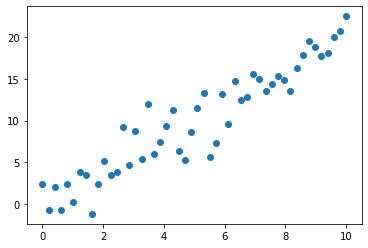

In [63]:
plt.scatter(X, Y)

In [64]:
X = X.reshape(-1,1)
n, m = X.shape
beta = np.zeros(1)
alpha = 1
tol = 0.0001
temp = []
for i in range(1000):
    Y_pred = X @ beta
    gradient = -(X.T @ (Y - Y_pred))
    temp.append(gradient)
    beta -= tol * gradient / n

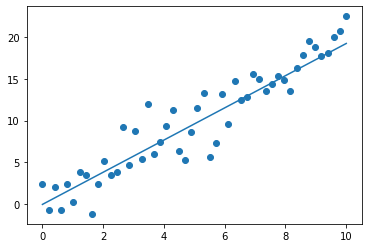

In [65]:
Y_result = X @ beta
plt.scatter(X, Y)
plt.plot(X, Y_result)

In [6]:
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
r2_score(Y_pred, Y)

0.6167576730333505

In [7]:
model = Ridge()
model.fit(X, Y)
Y_pred = model.predict(X)
r2_score(Y_pred, Y)

0.6165888743237311